# Julie Flament



## Research question/interests
**How does a lack of resources due to low wealth affect the literacy rate?**
# Briefly describe your research question or interests here.
To answer my question, I will compare three levels of wealth: rich, middle-class, and poor. I will use the wealth column in our data set that classifies each individual into a specific quintile (1-5). I will presumably use a bar graph with three bars representing the different wealth levels. A bar graph will highlight the differences in literacy rates due to the unequal distribution of wealth.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("../data/raw/dataset_raw.csv")
data

/var/folders/x4/h44f89l95tl5c0rb2t5rbtqc0000gp/T/ipykernel_2003/3848680907.py:5: DtypeWarning: Columns (12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../data/raw/dataset_raw.csv")


,iso_code,region_group,income_group,country,survey,year,level,grade,category,Sex,...,rlevel3_m,rlevel3_no,slevel3_m,slevel3_no,mlevel4_m,mlevel4_no,rlevel4_m,rlevel4_no,slevel4_m,slevel4_no
0,AFG,Central and Southern Asia,Low income countries,Afghanistan,DHS,2015.0,NaN,NaN,Ethnicity,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Central and Southern Asia,Low income countries,Afghanistan,DHS,2015.0,NaN,NaN,Ethnicity,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Central and Southern Asia,Low income countries,Afghanistan,DHS,2015.0,NaN,NaN,Ethnicity,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Central and Southern Asia,Low income countries,Afghanistan,DHS,2015.0,NaN,NaN,Ethnicity,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Central and Southern Asia,Low income countries,Afghanistan,DHS,2015.0,NaN,NaN,Ethnicity,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212964,NaN,Northern Africa and Western Asia,NaN,NaN,NaN,NaN,NaN,NaN,Wealth,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212965,NaN,Northern Africa and Western Asia,NaN,NaN,NaN,NaN,NaN,NaN,Wealth,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212966,NaN,Northern Africa and Western Asia,NaN,NaN,NaN,NaN,NaN,NaN,Wealth,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212967,NaN,Oceania,NaN,NaN,NaN,NaN,NaN,NaN,Wealth,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
dataset = data[["income_group","region_group","year","Location","Wealth","literacy_1524_m"]]
dataset.describe()

,year,literacy_1524_m
count,212879.000000,25558.000000
mean,2009.909070,0.766760
std,5.434321,0.278033
min,1996.000000,0.000000
25%,2006.000000,0.625225
50%,2011.000000,0.888000
75%,2015.000000,0.992400
max,2019.000000,1.000000


In [3]:
dataset = dataset.dropna(subset="literacy_1524_m")
dataset = dataset.reset_index()
dataset = dataset.drop(columns = ["index"])
dataset

,income_group,region_group,year,Location,Wealth,literacy_1524_m
0,Low income countries,Central and Southern Asia,2015.0,NaN,NaN,0.471900
1,Low income countries,Central and Southern Asia,2015.0,NaN,NaN,0.721900
2,Low income countries,Central and Southern Asia,2015.0,NaN,NaN,0.527200
3,Low income countries,Central and Southern Asia,2015.0,NaN,NaN,0.440500
4,Low income countries,Central and Southern Asia,2015.0,NaN,NaN,0.554100
...,...,...,...,...,...,...
25553,Lower middle income countries,Sub-Saharan Africa,2014.0,NaN,Quintile 5,0.994400
25554,Lower middle income countries,Sub-Saharan Africa,2014.0,NaN,Quintile 5,0.993100
25555,Lower middle income countries,Sub-Saharan Africa,2014.0,NaN,Quintile 5,1.000000
25556,Lower middle income countries,Sub-Saharan Africa,2014.0,NaN,Quintile 5,0.998800


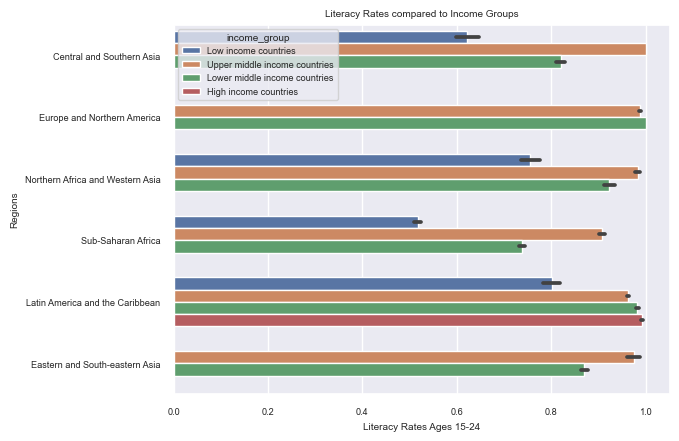

In [4]:
sns.set(font_scale=0.6)
plot = sns.barplot(data = dataset, y = dataset["region_group"], hue = dataset["income_group"], x = dataset["literacy_1524_m"]).set( title = "Literacy Rates compared to Income Groups", xlabel = "Literacy Rates Ages 15-24", ylabel = "Regions")
#sns.move_legend(plot, bbox_to_anchor=(1.5, 1), loc = "upper right")
#plot.legend(bbox_to_anchor=(2, 1))

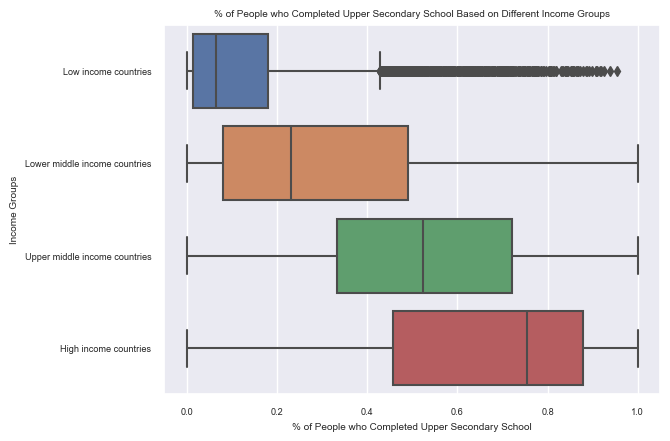

In [16]:
dataset2 = data[["income_group","region_group","literacy_1524_m", "Sex","Location","Wealth","comp_upsec_v2_m", "comp_prim_v2_m", "comp_lowsec_v2_m"]]
dataset2.describe()
plot2 = sns.boxplot(data = dataset2, x = "comp_upsec_v2_m", y = "income_group").set(title = "% of People who Completed Upper Secondary School Based on Different Income Groups", xlabel = "% of People who Completed Upper Secondary School", ylabel = "Income Groups")


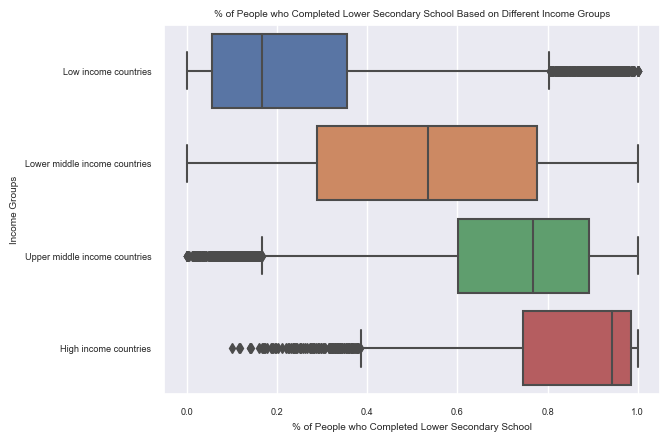

In [15]:
plot3 = sns.boxplot(data=dataset2, y="income_group", x="comp_lowsec_v2_m").set(title = "% of People who Completed Lower Secondary School Based on Different Income Groups", xlabel = "% of People who Completed Lower Secondary School", ylabel = "Income Groups")



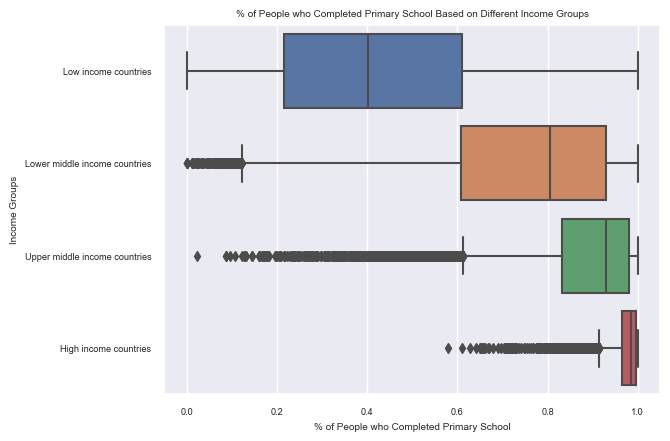

In [14]:
plot4 = sns.boxplot(data=dataset2, y="income_group", x="comp_prim_v2_m").set(title = "% of People who Completed Primary School Based on Different Income Groups", xlabel = "% of People who Completed Primary School", ylabel = "Income Groups")


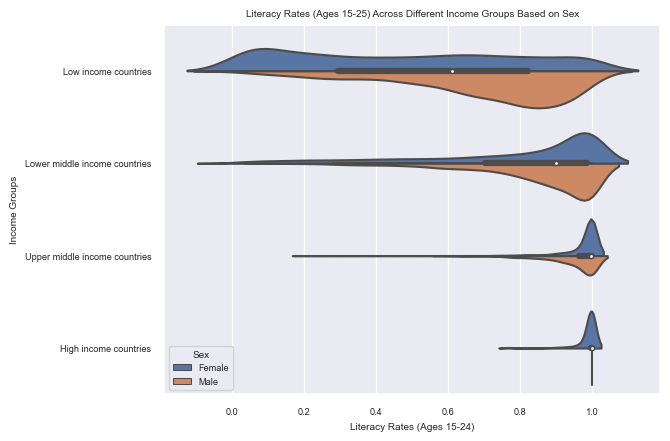

In [13]:
plot5 = sns.violinplot(data=dataset2, x="literacy_1524_m", y="income_group", hue="Sex", split=True).set(title = "Literacy Rates (Ages 15-25) Across Different Income Groups Based on Sex", xlabel = "Literacy Rates (Ages 15-24)", ylabel = "Income Groups")




## Research question/interests
**Does gender affect how wealth impacts literacy rates around the world?**
Are there countries where being wealthier results in only one gender having higher literacy rates?


My plan is to create a new plots that specifically compare wealth and gender. Now that I compared wealth to region, I can compare it to gender which will provide me with even more insight on how wealth affect literacy rates. I plan on continuing to use the literacy_1524_m and literacy_1527_no columns to provide data. I also now plan to use the column Gender. I will create several bar plots each comparing Gender and Wealth. Finally, I will create a FaceGrid plot to compare income_groups with gender.

### Notes regarding the data collected above

- countries in Latin-American and the Caribbean have higher literacy rates throughout most of the Quintiles. Why does wealth have a lesser impact on literacy rates in those regions?
- countries in Sub-Saharan Africa have an overall lower literacy rates no matter the quintile. However, the higher the quintile, the more there are a few countries in Sub-Saharan Africa that have a higher literacy rate. Wealth clearly has an effect on the literacy rates in this region. 
- Central and Southern Asian countries have higher literacy rates (only in quintile 3-5) than other countries 

